# 04 - Diskretna fourierova transofrmacija
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, november 2023 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Pri numeričnem izračunavanju Fourierove transformacije

\begin{equation}
H(f) = \int_{-\infty}^\infty
h(t)\exp(2 \pi i f t) dt
\end{equation}

\begin{equation}
h(t) = \int_{-\infty}^\infty
H(f)\exp(-2 \pi i f t) d f
\end{equation}

je funkcija $h(t)$ običajno predstavljena s tablico diskretnih
vrednosti
\begin{equation}
  h_k = h(t_k),\quad t_k = k \Delta, \quad k=0,1,2,\dots N-1.
\end{equation}
Pravimo, da smo funkcijo vzorčili z vzorčno gostoto (frekvenco) $f=1/\Delta$.
Za tako definiran vzorec obstaja naravna meja frekvenčnega spektra,
ki se imenuje *Nyquistova frekvenca*, $f_c =1/(2\Delta)$:
harmonični val s to frekvenco ima v vzorčni gostoti ravno
dva vzorca v periodi.
Če ima funkcija $h(t)$ frekvenčni spekter omejen na interval
$[-f_c, f_c ]$, potem ji z vzorčenjem nismo odvzeli nič informacije,
kadar pa se spekter razteza izven intervala, pride do *potujitve* oz. *aliasing*, ko se zunanji del spektra preslika v interval.

Frekvenčni spekter vzorčene funkcije računamo samo
v $N$ točkah, če hočemo, da se ohrani količina informacije.
Vpeljemo vsoto
\begin{equation}
H_n = \sum_{k=0}^{N-1}
h_k \exp(2 \pi i k n / N),
\qquad n=-\tfrac{N}{2},\dots ,\tfrac{N}{2},
\end{equation}
ki jo imenujemo diskretna Fourierova transformacija
in je povezana s funkcijo takole:
\begin{equation*}
H(\tfrac{n}{N\Delta}) \approx \Delta\cdot H_n .
\end{equation*}
Zaradi potujitve, po kateri je $H_{-n} = H_{N-n}$, lahko pustimo
indeks $n$ v enačbi za DFT teči tudi od 0 do $N$. Spodnja polovica
tako definiranega spektra ($1 \le n \le \tfrac{N}{2}-1$) ustreza pozitivnim
frekvencam $0 < f < f_c$, gornja polovica ($\tfrac{N}{2}+1 \le N-1$)
pa negativnim, $-f_c < f < 0$.  Posebna vrednost pri $n=0$
ustreza frekvenci nič ("istosmerna komponenta"), vrednost
pri $n=N/2$ pa ustreza tako $f_c$ kot $-f_c$.

Količine $h$ in $H$ so v splošnem kompleksne, simetrija
v enih povzroči tudi simetrijo v drugih.  

V tesni zvezi s frekvenčnim spektrom je tudi moč.
*Celotna moč* nekega signala je neodvisna od
reprezentacije, Parsevalova enačba pove
\begin{equation*}
\sum_{k=0}^{N-1} | h_k |^2 = {1\over N}\sum_{n=0}^{N-1} | H_n |^2
\end{equation*}
(lahko preveriš).  Pogosto pa nas bolj zanima, koliko moči
je vsebovane v frekvenčni komponenti med $f$ in $f+d f$, zato
definiramo enostransko spektralno gostoto moči (one-sided
power spectral density, PSD)
\begin{equation*}
P_n = | H_n |^2 + | H_{N-n} |^2 \>.
\end{equation*}
Pozor: s takšno definicijo v isti koš mečemo negativne
in pozitivne frekvence, vendar sta pri realnih signalih $h_k$
prispevka enaka, tako da je $P_n = 2\,| H_n |^2$.

Z obratno transformacijo lahko tudi rekonstruiramo $h_k$ iz $H_n$
\begin{equation}
  h_k = {1\over N} \sum_{n=0}^{N-1} H_n \exp(-2 \pi i k n / N)
\end{equation}
(razlika glede na zgornjo enačbo je le predznak v argumentu
eksponenta in utež $1/N$).



## Naloga

1. Izračunaj Fourierov obrat Gaussove porazdelitve in nekaj enostavnih vzorcev,
npr. mešanic izbranih frekvenc. Za slednje primerjaj rezultate, ko
je vzorec v intervalu periodičen (izbrane frekvence so mnogokratniki
osnovne frekvence), z rezultati, ko vzorec ni periodičen (kako naredimo Gaussovo porazdelitev `periodično' za FT?).
Opazuj pojav potujitve na vzorcu, ki vsebuje frekvence nad Nyquistovo
frekvenco. Napravi še obratno transformacijo in preveri
natančnost metode. Poglej, kaj se dogaja z časom računanja - kako je odvisen od števila vzorčenj?
2. Po Fourieru analiziraj 2.3s dolge zapise začetka Bachove
partite za violino solo, ki jih najdeš na spletni strani
Matematičnofizikalnega praktikuma.  Signal iz začetnih taktov
partite je bil vzorčen pri 44100 Hz, 11025 Hz, 5512 Hz, 2756 Hz,
1378 Hz in 882 Hz. S poslušanjem zapisov v formatu `.mp3`
ugotovi, kaj se dogaja, ko se znižuje frekvenca vzorčenja,
nato pa s Fourierovo analizo zapisov v formatu `.txt`.
to tudi prikaži.

3. Dodatno: Napravi Fourierovo analizo signalov, ki jih dobiš pri vaji Akustični resonator pri Fizikalnem praktikumu II.

In [ ]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

#plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Diskretna Fourierova transformacija

In [ ]:
# DFT settings
delta = 50
smpl_freq = 1 / delta
critical_freq = 1 / (2*delta)

### Prikaz nekaterih funkcij

V nadaljevanju si pogledamo diskretne Fourierove transformacije nakterih zanimivih funkcij na intervalu $[-a,a]$ za $a = 2\, \pi$. Izberemo sledeče funkcije (vzorčene vsaka z 250 točkami na interval):

1. $\cos(3x)$
2. $\sin(3x)$
3. $\cos(3x) + \sin(15x)$
4. Gaussova funkcija neperiodične oblike
5. Gaussova funkcija, ki jo vzorčimo na $[0, a]$ in ta del še enkrat prezrcalimo čez točko $a$ - dobimo "periodično" obliko

In [209]:
# Function definitions

def manual_fftshift(f_k):
    N = len(f_k)
    shifted = np.zeros_like(f_k)
    
    # For even length arrays
    if N % 2 == 0:
        shifted[:N//2] = f_k[N//2:]
        shifted[N//2:] = f_k[:N//2]
    # For odd length arrays
    else:
        shifted[:(N+1)//2] = f_k[(N+1)//2-1:]
        shifted[(N+1)//2:] = f_k[:(N+1)//2-1]
    
    return shifted

def dft(f_n):
    N = len(f_n)
    f_k = np.zeros((N), dtype=np.complex128)
    k=0
    while k<N:
        n = 0
        while n<N:
            f_k[k] += f_n[n] * np.exp(-2.0*np.pi*1j*k*n/N)
            n += 1
        k += 1
    # shift the zero frequency component to the center
    return manual_fftshift(f_k)

def sample(t, f, samples):
    t_k = np.linspace(t[0], t[-1], samples, endpoint=False)
    h_k = f(t_k)
    delta = np.abs(t[-1] - t[0]) / samples
    return t_k, h_k, delta

def mirror_interval(arr):
    arr1 = np.copy(arr)
    arr2 = np.copy(arr)
    arr2 = np.flip(arr2)
    return np.concatenate((arr1, arr2))


In [ ]:
samples = 250
t = np.linspace(-2*np.pi, 2*np.pi, samples)
t_mirror = np.linspace(0, 2*np.pi, samples // 2)

delta = np.abs(t[1] - t[0])
delta_mirror = np.abs(t_mirror[1] - t_mirror[0])

sampling_f = 1 / delta
sampling_f_mirror = 1 / delta_mirror

sin = lambda x: np.sin(3*x)
cos = lambda x: np.cos(3*x)
mixed = lambda x: np.sin(3*x) + np.cos(15*x)
gaussian = lambda x: stats.norm.pdf(x, scale=0.5)

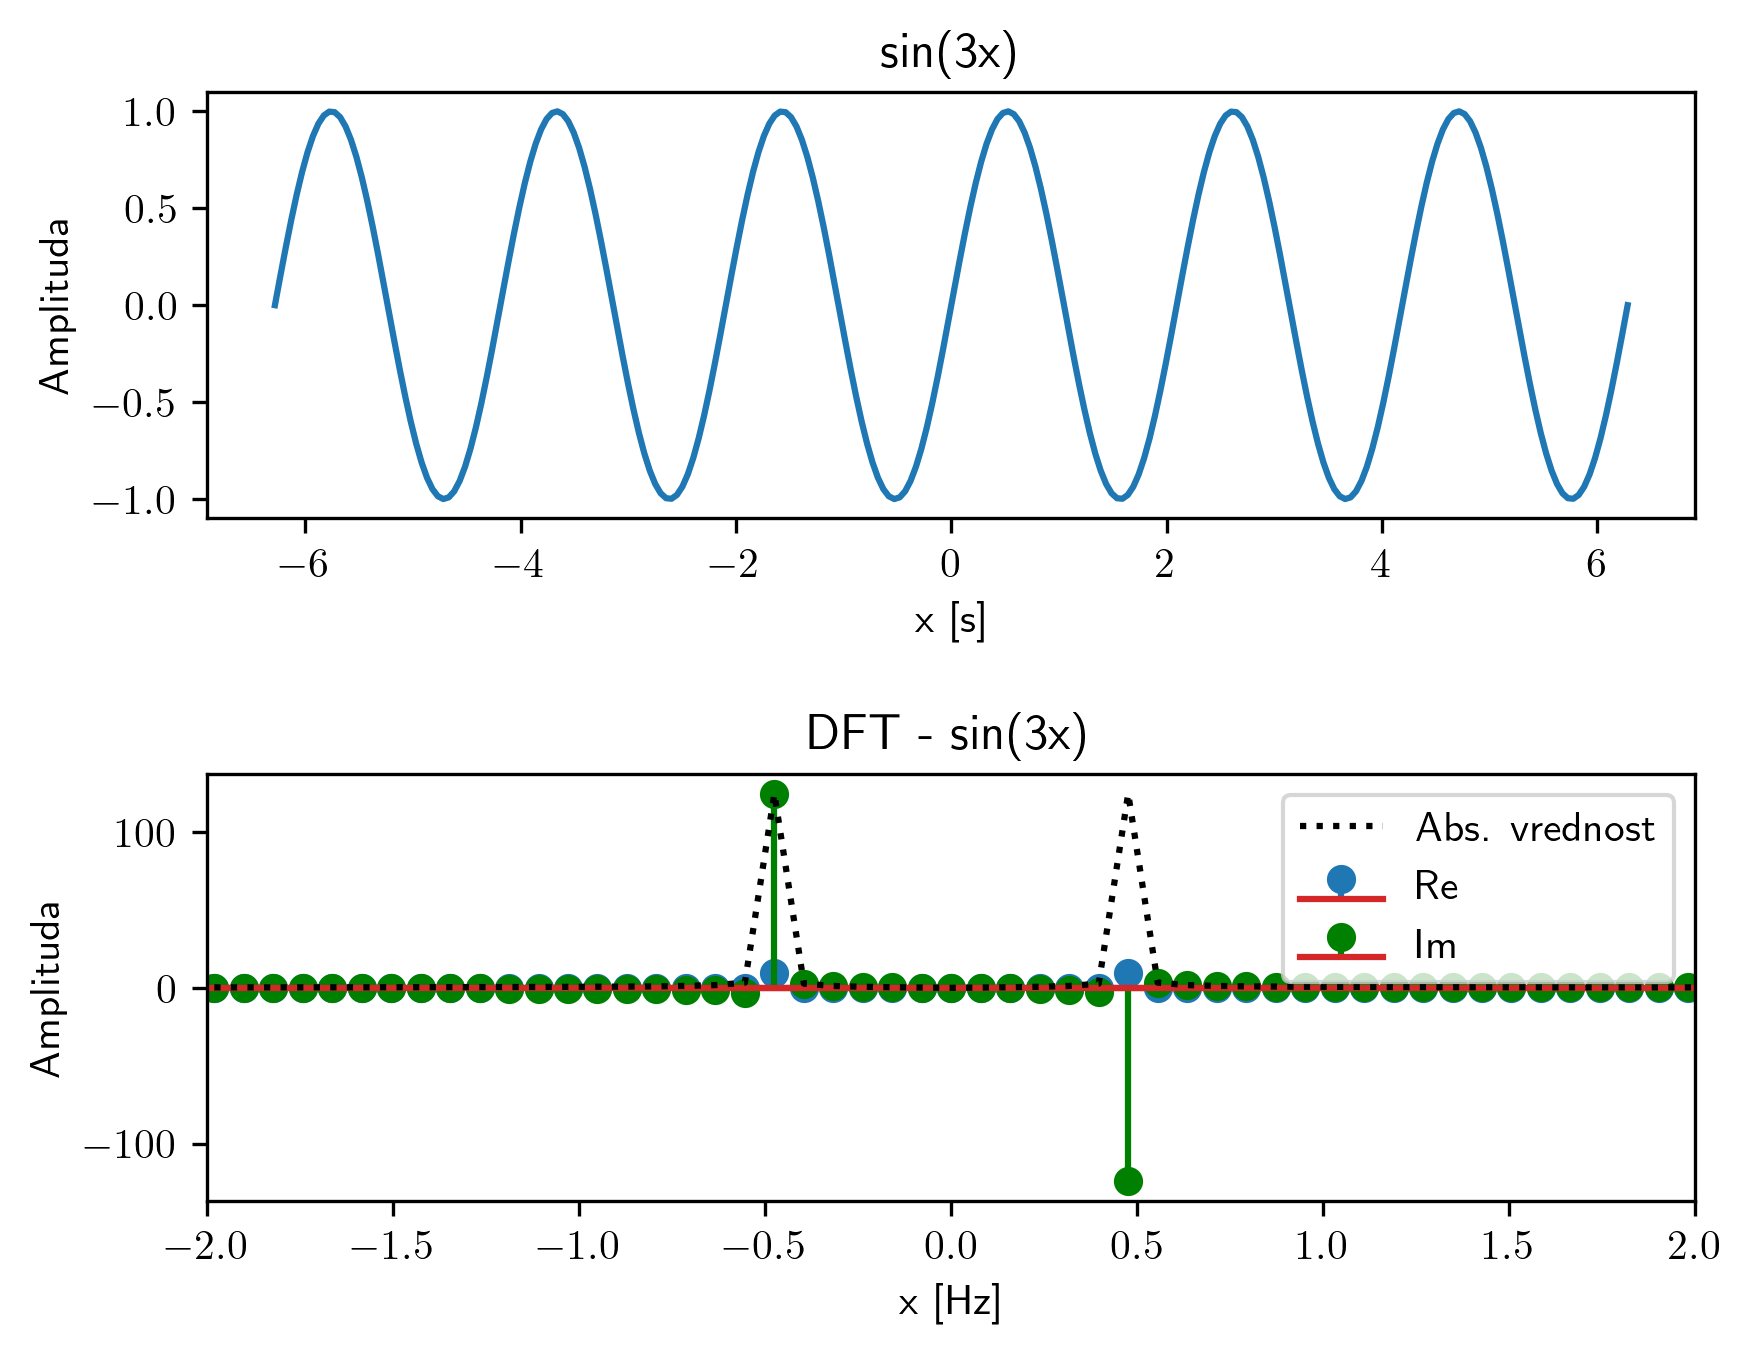

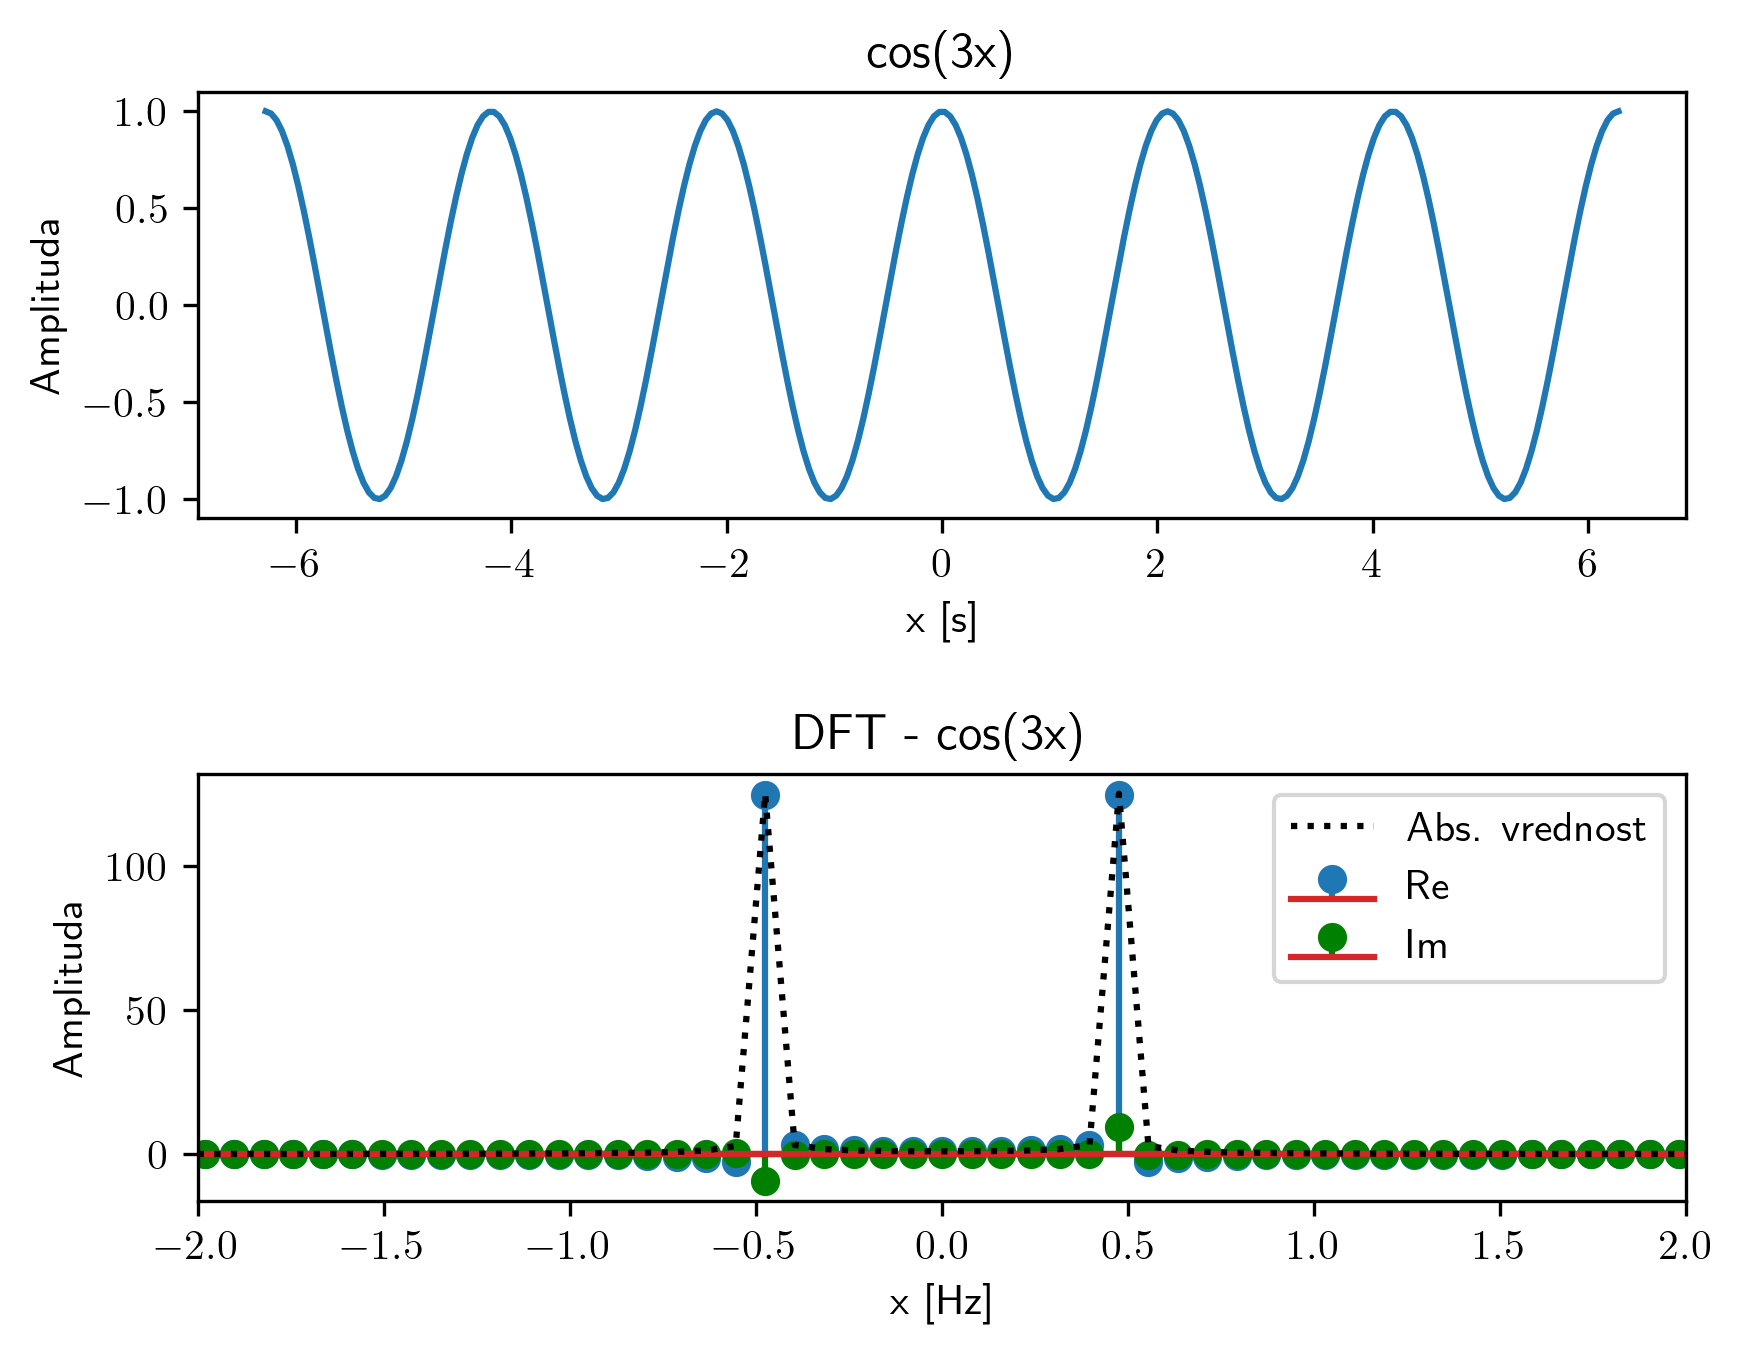

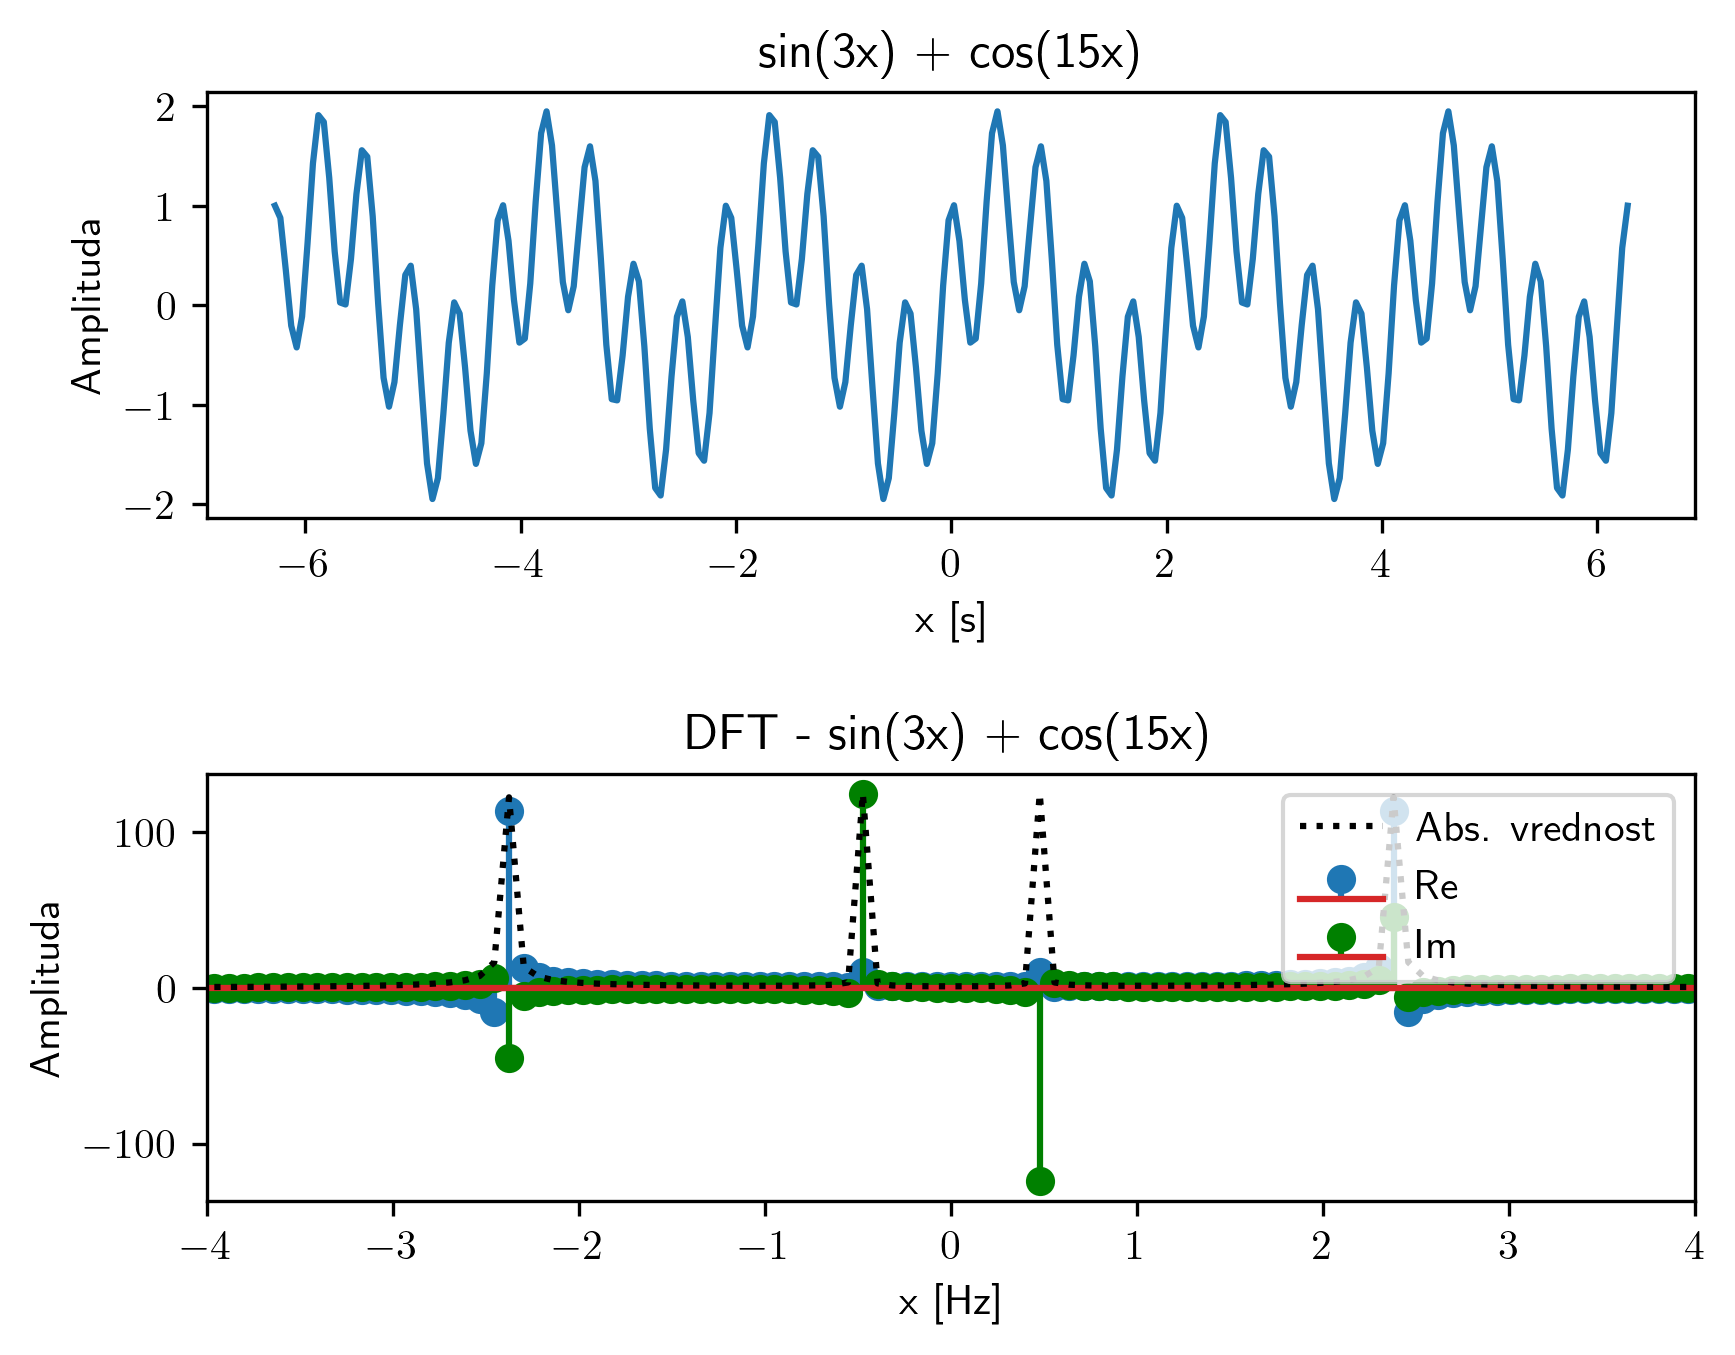

250 250


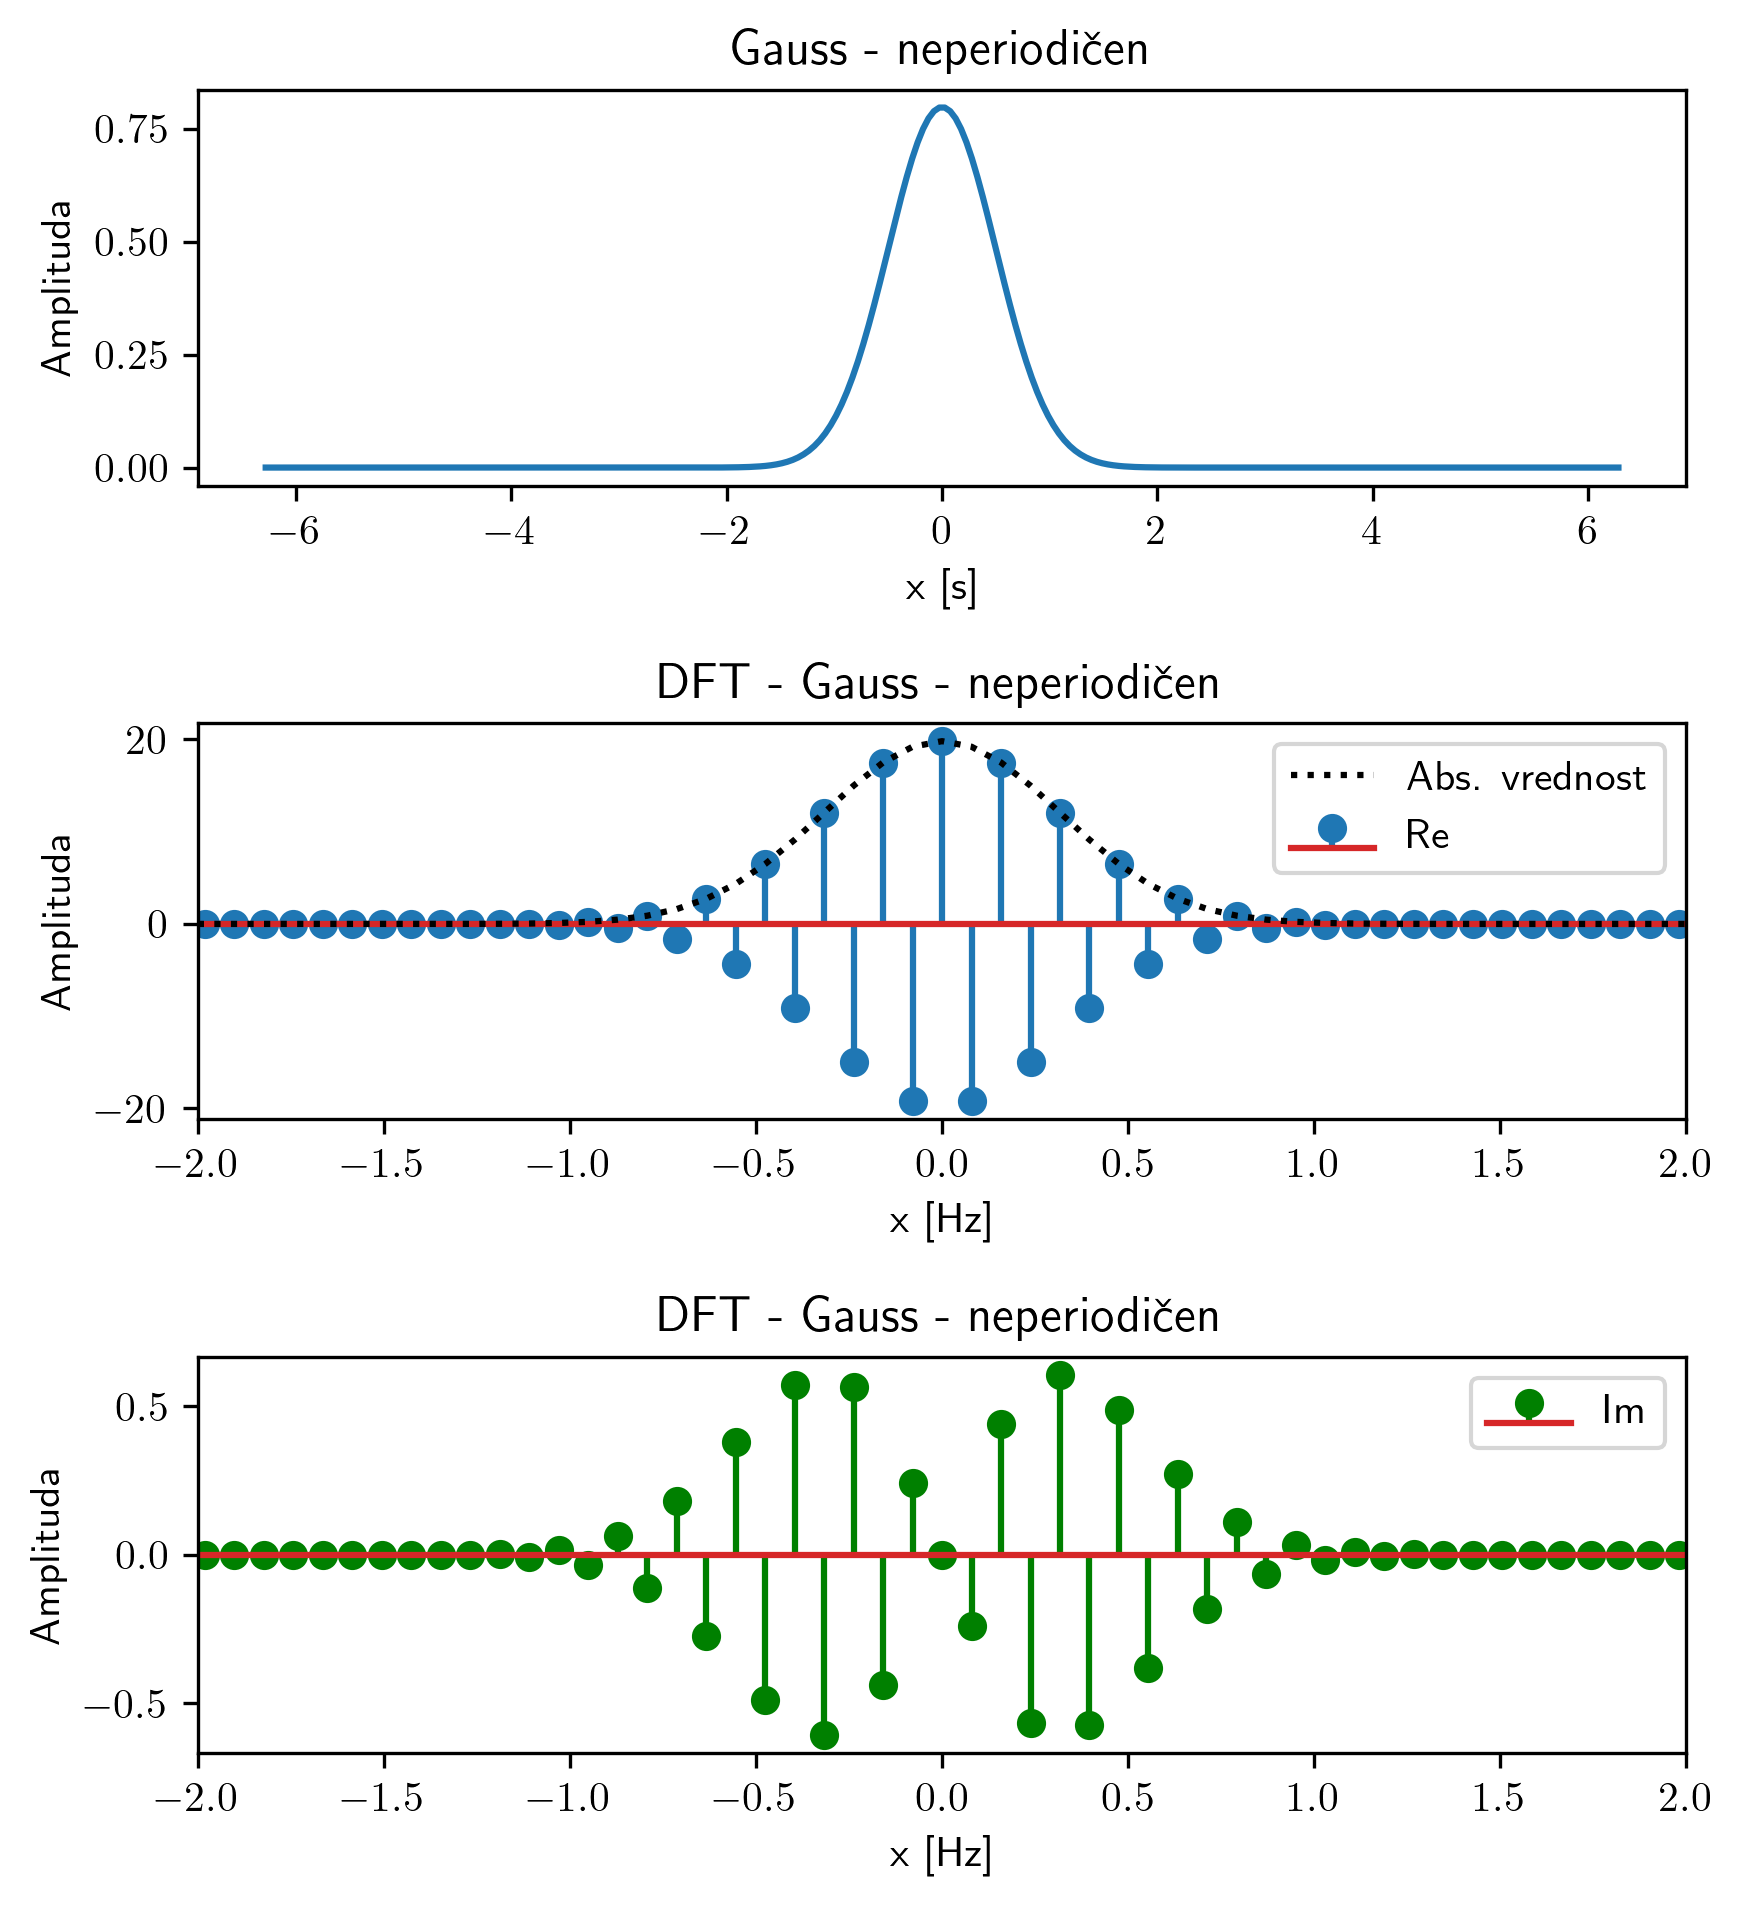

250 250


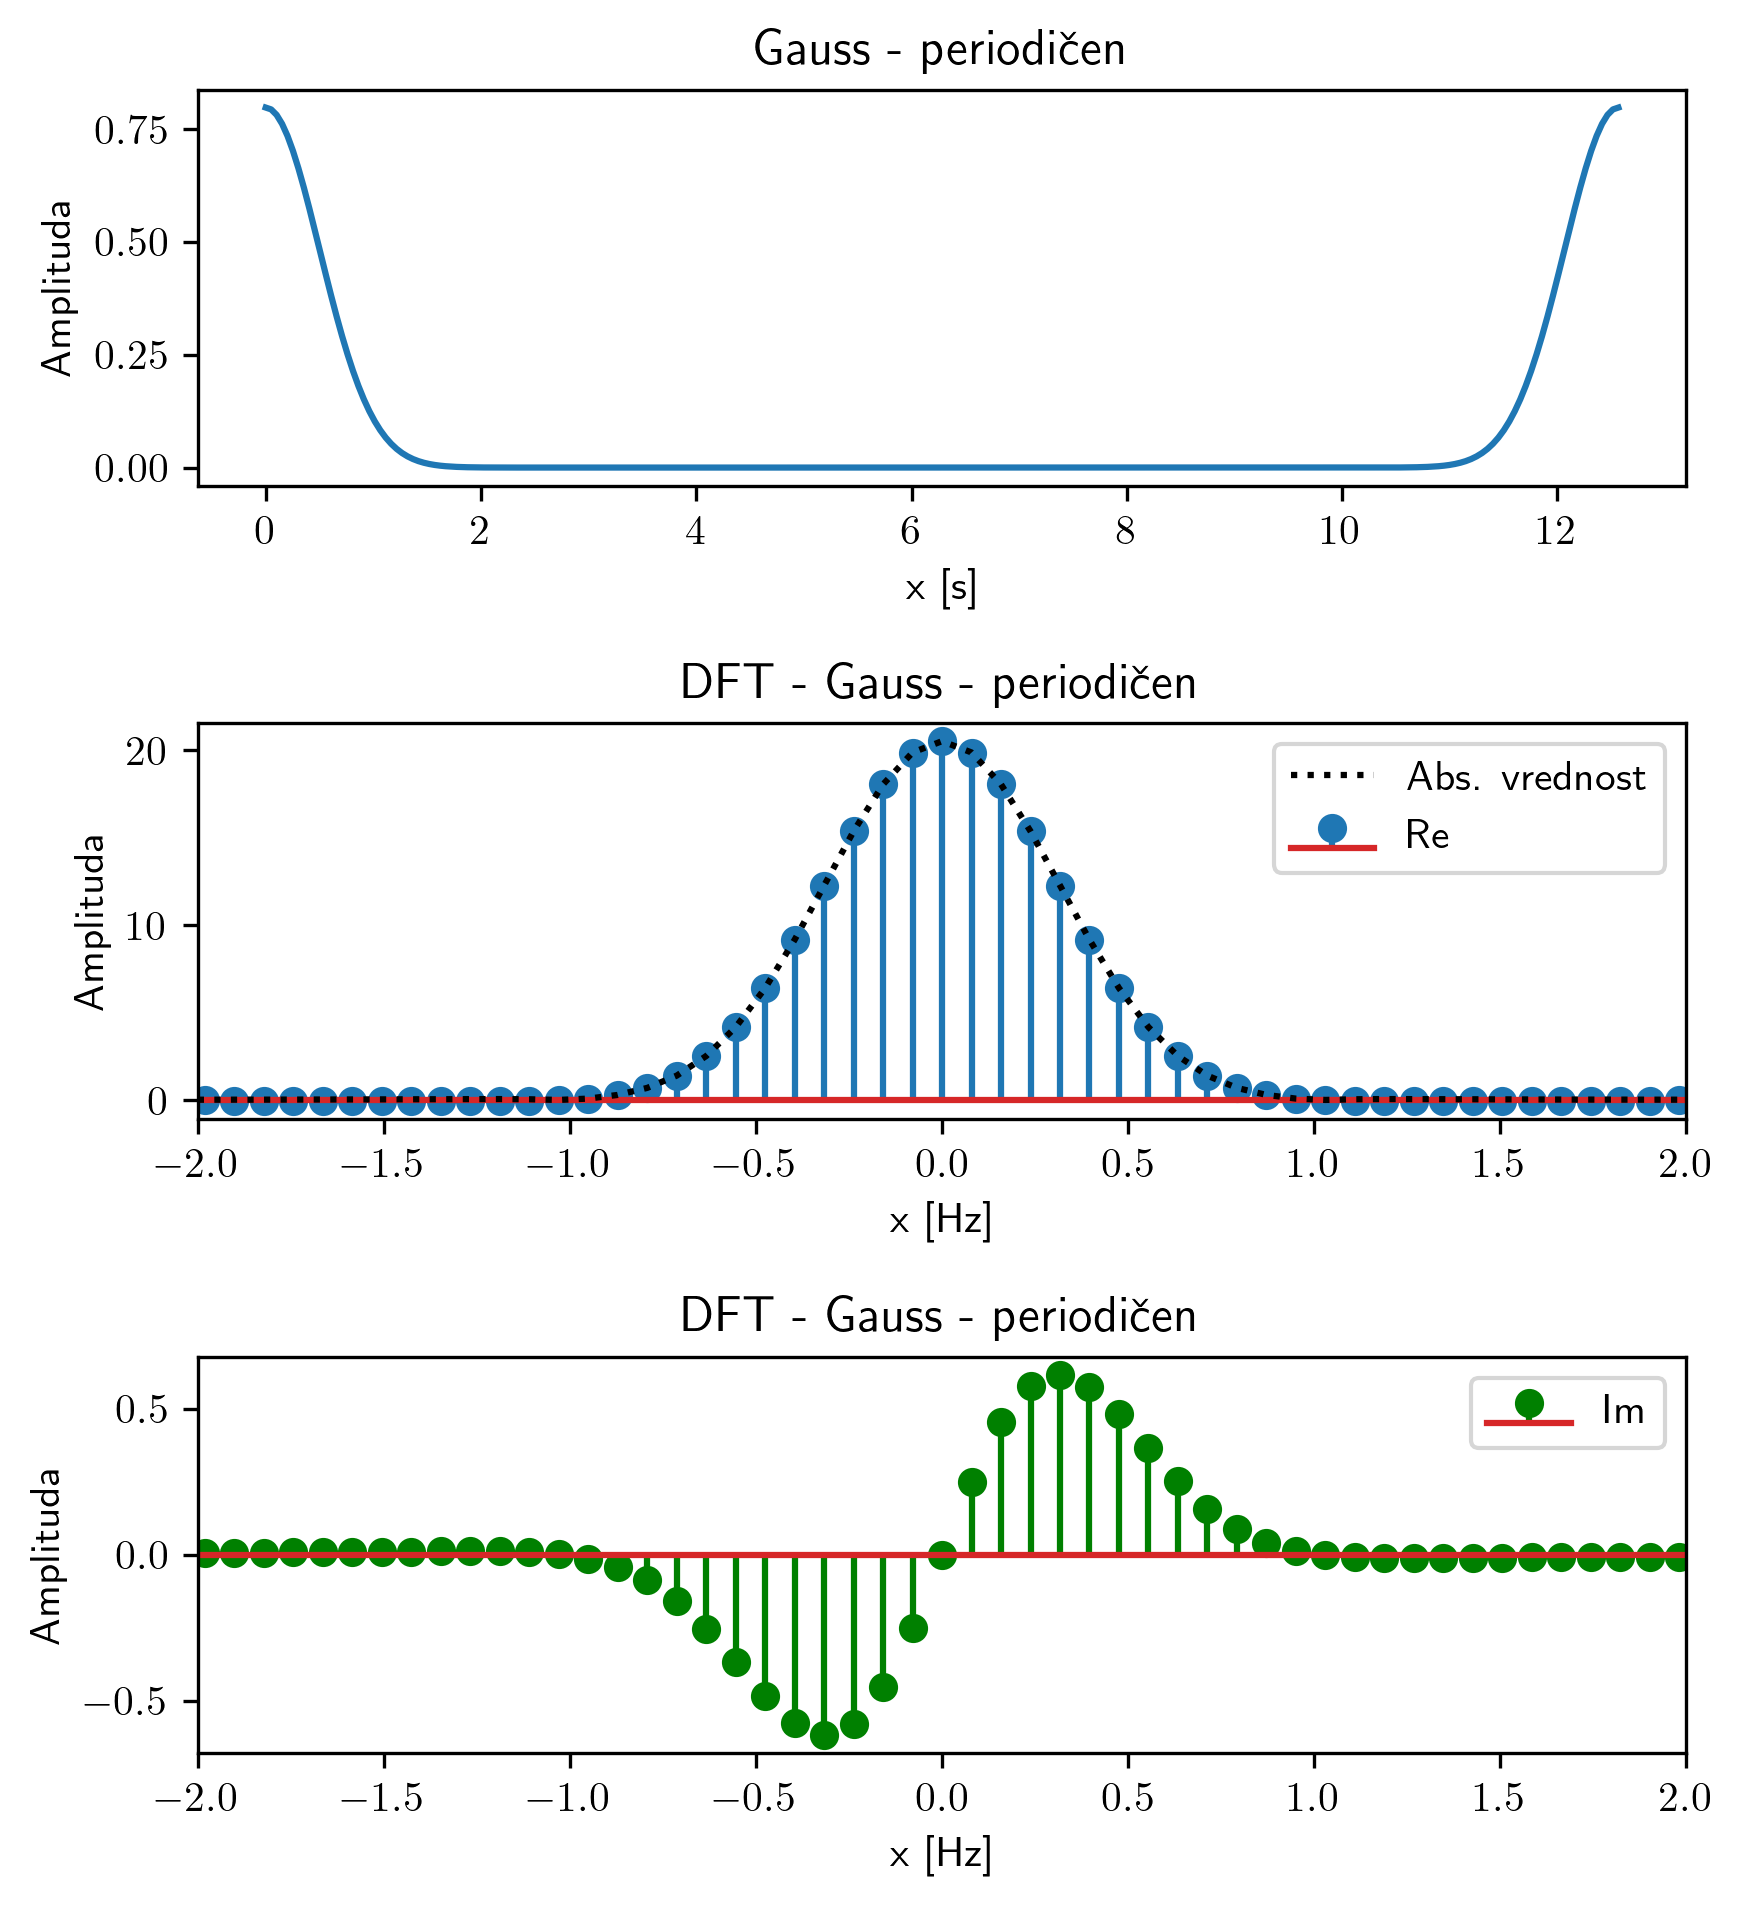

In [214]:
def plot_dft(t, f, label, limit=2, mirror=False):
    fig, (ax1, ax2) = plt.subplots(2)        

    y = f(t)
    if mirror:
        y = mirror_interval(y)
        t = mirror_interval(t)
    
    ax1.plot(t, y)
    ax1.set_title(label)
    ax1.set_xlabel('x [s]')
    ax1.set_ylabel('Amplituda')

    y_dft = dft(y)
    t_dft = np.linspace(-sampling_f/2, sampling_f/2, samples, endpoint=False)
    ax2.stem(t_dft, np.real(y_dft), label='Re')
    ax2.stem(t_dft, np.imag(y_dft), 'g', label='Im')
    ax2.plot(t_dft, np.abs(y_dft), linestyle='dotted', color='black', label='Abs. vrednost')
    ax2.set_xlim(-limit, limit)
    ax2.set_title(f'DFT - {label}')
    ax2.set_xlabel('x [Hz]')
    ax2.set_ylabel('Amplituda')
    ax2.legend(loc=1)

    plt.subplots_adjust(hspace=0.6)

    plt.show()

def plot_dft_reimg(t, f, label, limit=2, mirror=False):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6.4, 7.2))        

    y = f(t)
    if mirror:
        y = mirror_interval(y)
        t = np.concatenate((t, t+2*np.pi))
        
    print(len(t), len(y))
    ax1.plot(t, y)
    ax1.set_title(label)
    ax1.set_xlabel('x [s]')
    ax1.set_ylabel('Amplituda')

    y_dft = dft(y)
    t_dft = np.linspace(-sampling_f/2, sampling_f/2, samples, endpoint=False)
    ax2.stem(t_dft, np.real(y_dft), label='Re')
    #ax2.stem(t_dft, np.imag(y_dft), 'g', label='Im')
    ax2.plot(t_dft, np.abs(y_dft), linestyle='dotted', color='black', label='Abs. vrednost')
    ax2.set_xlim(-limit, limit)
    ax2.set_title(f'DFT - {label}')
    ax2.set_xlabel('x [Hz]')
    ax2.set_ylabel('Amplituda')
    ax2.legend(loc=1)

    #ax3.stem(t_dft, np.real(y_dft), label='Re')
    ax3.stem(t_dft, np.imag(y_dft), 'g', label='Im')
    #ax3.plot(t_dft, np.abs(y_dft), linestyle='dotted', color='black', label='Abs. vrednost')
    ax3.set_xlim(-limit, limit)
    ax3.set_title(f'DFT - {label}')
    ax3.set_xlabel('x [Hz]')
    ax3.set_ylabel('Amplituda')
    ax3.legend(loc=1)


    plt.subplots_adjust(hspace=0.6)

    plt.show()

plot_dft(t, sin, 'sin(3x)')
plot_dft(t, cos, 'cos(3x)')
plot_dft(t, mixed, 'sin(3x) + cos(15x)', 4)
plot_dft_reimg(t, gaussian, 'Gauss - neperiodičen')
plot_dft_reimg(t_mirror, gaussian, 'Gauss - periodičen', mirror=True)

## Zaključek


---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/04_DFT), 2023